In [53]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2
import shutil
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jdEkrwqJew0xkFmxo73k")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
dataset = project.version(1).download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in multiclass:: 100%|██████████| 1736/1736 [00:00<00:00, 5135.80it/s]


In [14]:
#importing testing and training data
train = pd.read_csv('/content/American-Sign-Language-Letters-1/train/_classes.csv')
test = pd.read_csv('/content/American-Sign-Language-Letters-1/test/_classes.csv')

In [15]:
#inspect training data
train.head()

,filename,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,J30_jpg.rf.00d20e595026b31773ded47509545471.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


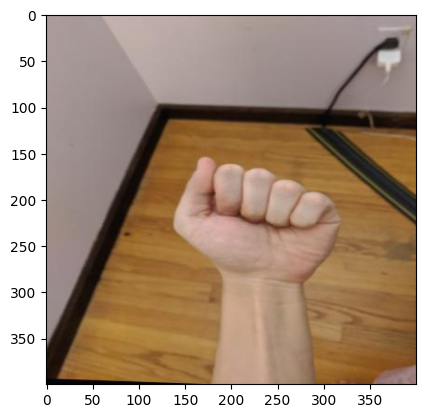

In [16]:
#Inspect an image

# Construct image path
img_path = '/content/American-Sign-Language-Letters-1/train/A13_jpg.rf.ae43f794ac52ed83c47f4df799a3504e.jpg'

# Load and display the image
img = mpimg.imread(img_path)

# Plot the image
plt.imshow(img)

In [18]:
#Extracting labels from the filename

dataset_path = '/content/American-Sign-Language-Letters-1/train'
filenames = os.listdir(dataset_path)

# Adjust the regular expression pattern to capture only letters
label_pattern = re.compile(r'^([A-Za-z]+)\d+_')

labels = [label_pattern.match(filename).group(1) for filename in filenames if label_pattern.match(filename)]

print(labels)

['Z', 'Y', 'H', 'L', 'Z', 'O', 'S', 'U', 'J', 'J', 'L', 'Z', 'H', 'F', 'P', 'V', 'T', 'I', 'G', 'I', 'P', 'K', 'P', 'Z', 'D', 'J', 'M', 'P', 'T', 'J', 'K', 'Y', 'S', 'Q', 'H', 'S', 'I', 'P', 'D', 'J', 'V', 'W', 'N', 'E', 'N', 'V', 'W', 'H', 'D', 'K', 'R', 'K', 'W', 'P', 'W', 'Z', 'G', 'G', 'S', 'L', 'Y', 'R', 'O', 'S', 'W', 'R', 'F', 'S', 'X', 'S', 'Y', 'L', 'H', 'L', 'Z', 'D', 'W', 'J', 'I', 'I', 'G', 'G', 'V', 'F', 'J', 'J', 'Z', 'G', 'E', 'M', 'Q', 'W', 'W', 'A', 'A', 'U', 'D', 'J', 'O', 'E', 'E', 'M', 'B', 'I', 'F', 'V', 'Q', 'W', 'D', 'E', 'B', 'R', 'T', 'Z', 'S', 'H', 'O', 'E', 'E', 'C', 'A', 'L', 'T', 'R', 'E', 'T', 'C', 'Q', 'D', 'K', 'L', 'L', 'D', 'Z', 'A', 'A', 'T', 'N', 'R', 'A', 'D', 'V', 'S', 'M', 'E', 'J', 'K', 'J', 'P', 'J', 'R', 'J', 'G', 'W', 'F', 'X', 'V', 'S', 'J', 'X', 'G', 'V', 'O', 'A', 'V', 'T', 'N', 'Z', 'Z', 'T', 'C', 'L', 'Z', 'E', 'V', 'C', 'N', 'F', 'J', 'L', 'I', 'G', 'A', 'Z', 'I', 'G', 'U', 'K', 'U', 'D', 'V', 'X', 'F', 'I', 'I', 'S', 'D', 'G', 'L', 'A',

In [6]:
#Extracting labels from Train dataset
dataset_path = '/content/American-Sign-Language-Letters-1/train'
output_path = '/content/American-Sign-Language-Letters-1/TrainLabel'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Dictionary to store labels and their corresponding files
label_files = {}

# Iterate through the filenames and organize them into folders based on the first capital letter
for filename in os.listdir(dataset_path):
    # Extract the first capital letter as the label
    label = next((char.upper() for char in filename if char.isalpha()), None)

    if label:
        # Create the corresponding directory if it doesn't exist
        label_directory = os.path.join(output_path, label)
        os.makedirs(label_directory, exist_ok=True)

        # Move the file to the corresponding directory
        source_path = os.path.join(dataset_path, filename)
        destination_path = os.path.join(label_directory, filename)

        if label not in label_files:
            label_files[label] = [filename]
        else:
            label_files[label].append(filename)

        shutil.move(source_path, destination_path)

# Print the labels and corresponding files
for label, files in label_files.items():
    print(f"Label {label}: {files}")

Label Z: ['Z23_jpg.rf.704b2da7d23019957181835f96e42cf3.jpg', 'Z20_jpg.rf.93f86ccdef0af86d8cf8cca85677656c.jpg', 'Z26_jpg.rf.4a1805ac52f6fe66a120b9b20b10f944.jpg', 'Z17_jpg.rf.ab719b2b3051cfceb985af9c5d91c7c0.jpg', 'Z19_jpg.rf.f7f85dbd2e22f4e7415454a80e2cd51e.jpg', 'Z24_jpg.rf.531c717ba4cc78d0baa3344f00867728.jpg', 'Z14_jpg.rf.6bed4c2de295f57f0da7f7ad1affd060.jpg', 'Z1_jpg.rf.b74a9ea1348a5ed008b4ca33c88d4f93.jpg', 'Z5_jpg.rf.b6f759aa37696436dbfadbb167230f40.jpg', 'Z26_jpg.rf.259ff45a4422de7a713213187a672883.jpg', 'Z10_jpg.rf.8d515a44b7041028299df663502388dc.jpg', 'Z12_jpg.rf.aead6bf7e0fc9e542174f72ace2bea05.jpg', 'Z19_jpg.rf.576d00ed48270b45b9a9739b5d067d6e.jpg', 'Z21_jpg.rf.84fbe761068c40007e205f3287c3f5a7.jpg', 'Z8_jpg.rf.2568ebce12fca75ea01fdba52145402f.jpg', 'Z10_jpg.rf.9943135cca98d2e9887c67a937cd7fb4.jpg', 'Z8_jpg.rf.81357aeb1a89b914fc16d5a0418db9ff.jpg', 'Z14_jpg.rf.b200298397492aa1e9e1b58440d8edbf.jpg', 'Z21_jpg.rf.95c18c5e627bef4b90a5755dd3c6e0b9.jpg', 'Z13_jpg.rf.e33586c5b5871

In [7]:
#Extracting labels from test dataset
dataset_path = '/content/American-Sign-Language-Letters-1/test'
output_path = '/content/American-Sign-Language-Letters-1/TestLabel'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Dictionary to store labels and their corresponding files
label_files = {}

# Iterate through the filenames and organize them into folders based on the first capital letter
for filename in os.listdir(dataset_path):
    # Extract the first capital letter as the label
    label = next((char.upper() for char in filename if char.isalpha()), None)

    if label:
        # Create the corresponding directory if it doesn't exist
        label_directory = os.path.join(output_path, label)
        os.makedirs(label_directory, exist_ok=True)

        # Move the file to the corresponding directory
        source_path = os.path.join(dataset_path, filename)
        destination_path = os.path.join(label_directory, filename)

        if label not in label_files:
            label_files[label] = [filename]
        else:
            label_files[label].append(filename)

        shutil.move(source_path, destination_path)

# Print the labels and corresponding files
for label, files in label_files.items():
    print(f"Label {label}: {files}")


Label O: ['O12_jpg.rf.9103647cd190af96ac2a83f7bd1d0ae2.jpg', 'O4_jpg.rf.82c403d496488192d134b233a080d258.jpg', 'O20_jpg.rf.517237686eca6346d6d72cbd96b79cb3.jpg']
Label V: ['V12_jpg.rf.0e68ec7ee88bd6f0f70fe5496e893068.jpg', 'V2_jpg.rf.f887a9d681a64f8a2efe8375245ab4bb.jpg', 'V27_jpg.rf.c316e3cfcddb7fe8d6ed9e06290b3b1c.jpg', 'V10_jpg.rf.18af9b37cbe013f9a0640294fb71f0d6.jpg']
Label I: ['I17_jpg.rf.8f1ed619e93147f7f9754a4eddbb90de.jpg', 'I28_jpg.rf.74efc17a40df4bbd0bc63625be836201.jpg']
Label Q: ['Q10_jpg.rf.87a66659eb5791bf51f56ff1e1883273.jpg', 'Q7_jpg.rf.07fdf6c096cd2a9be72b4de4a627935d.jpg']
Label S: ['S0_jpg.rf.4466ad3687a4cfac9f6e4474d89e121e.jpg', 'S6_jpg.rf.0b6e42445a56998369cdd3759c2cf3d4.jpg', 'S16_jpg.rf.138a4aa81180adcc24323c1634ed507e.jpg']
Label W: ['W24_jpg.rf.1bc37c6fc4770b284edc6f9027eb6cf2.jpg', 'W16_jpg.rf.5771e4967321c7e827758319e697bed6.jpg', 'W7_jpg.rf.c80a52e6a95797bd8cf3a03ec4701d99.jpg', 'W23_jpg.rf.caecf7140a005d779f0950cc7c6a7616.jpg', 'W19_jpg.rf.62d8144cb69396b1

In [8]:
# Remove the file for TrainLabel
file_path_train = '/content/American-Sign-Language-Letters-1/TrainLabel/C/_classes.csv'
if os.path.exists(file_path_train):
    os.remove(file_path_train)
else:
    print(f"The file {file_path_train} does not exist.")

# Remove the file for TestLabel
file_path_test = '/content/American-Sign-Language-Letters-1/TestLabel/C/_classes.csv'
if os.path.exists(file_path_test):
    os.remove(file_path_test)
else:
    print(f"The file {file_path_test} does not exist.")

In [27]:
# Pre-processing

#Auto-orient

def auto_orient(image_path, save_path=None, zoom_factor=1.5):
    # Load the image
    img = load_img(image_path)
    img_array = img_to_array(img)

    # Zooming transformation
    zoomed_img = zoom_image(img_array, zoom_factor)

    # Save the zoomed image if save_path is provided
    if save_path:
        cv2.imwrite(save_path, zoomed_img)

    return zoomed_img

def zoom_image(image, factor):
    # Zooming transformation
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 0, factor)
    zoomed_img = cv2.warpAffine(image, M, (cols, rows))

    return zoomed_img

def process_images_in_directory(directory_path, output_directory, zoom_factor=1.5):
    # Iterate over all files in the directory and its subdirectories
    for root, _, files in os.walk(directory_path):
        for file in files:
            # Check if the file is an image (you can modify the condition based on your file types)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Full path to the input image
                input_image_path = os.path.join(root, file)

                # Create corresponding output path in the output_directory
                relative_path = os.path.relpath(input_image_path, directory_path)
                output_image_path = os.path.join(output_directory, relative_path)

                # Create directories if they don't exist
                os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

                # Process the image and save it
                auto_orient(input_image_path, save_path=output_image_path, zoom_factor=zoom_factor)


#Test Label
input_directory = '/content/American-Sign-Language-Letters-1/TestLabel'
output_directory = '/content/American-Sign-Language-Letters-1/TestLabel_updated'
process_images_in_directory(input_directory, output_directory, zoom_factor=1.5)

In [28]:
# Pre-processing

#Auto-orient

def auto_orient(image_path, save_path=None, zoom_factor=1.5):
    # Load the image
    img = load_img(image_path)
    img_array = img_to_array(img)

    # Zooming transformation
    zoomed_img = zoom_image(img_array, zoom_factor)

    # Save the zoomed image if save_path is provided
    if save_path:
        cv2.imwrite(save_path, zoomed_img)

    return zoomed_img

def zoom_image(image, factor):
    # Zooming transformation
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 0, factor)
    zoomed_img = cv2.warpAffine(image, M, (cols, rows))

    return zoomed_img

def process_images_in_directory(directory_path, output_directory, zoom_factor=1.5):
    # Iterate over all files in the directory and its subdirectories
    for root, _, files in os.walk(directory_path):
        for file in files:
            # Check if the file is an image (you can modify the condition based on your file types)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Full path to the input image
                input_image_path = os.path.join(root, file)

                # Create corresponding output path in the output_directory
                relative_path = os.path.relpath(input_image_path, directory_path)
                output_image_path = os.path.join(output_directory, relative_path)

                # Create directories if they don't exist
                os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

                # Process the image and save it
                auto_orient(input_image_path, save_path=output_image_path, zoom_factor=zoom_factor)

# Train Label
input_directory = '/content/American-Sign-Language-Letters-1/TrainLabel'
output_directory = '/content/American-Sign-Language-Letters-1/TrainLabel_updated'
process_images_in_directory(input_directory, output_directory, zoom_factor=1.5)


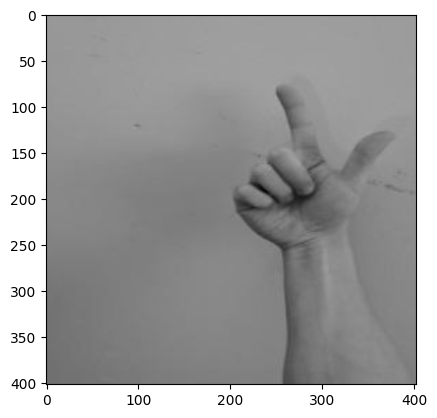

In [29]:
# Viewing resize and grayscale image

img_path = '/content/American-Sign-Language-Letters-1/TrainLabel_updated/L/L10_jpg.rf.a80228ff3aa6cef6b7dd02efeeb89c6a.jpg'

# Load and display the image
img = mpimg.imread(img_path)

# Plot the image
plt.imshow(img)

In [30]:
# Specifying dataset paths
train_dataset_path = '/content/American-Sign-Language-Letters-1/TrainLabel_updated'
test_dataset_path = '/content/American-Sign-Language-Letters-1/TestLabel_updated'

# Function to load and preprocess images
def preprocess_images(dataset_path):
    images = []
    labels = []

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)

        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)

            try:
                # Check if the file is a valid image
                img = load_img(image_path, target_size=(64, 64))
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
                continue

            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)


In [31]:
# Splitting training data
X_train, y_train = preprocess_images(train_dataset_path)

# Splitting testing data
X_test, y_test = preprocess_images(test_dataset_path)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Perform one-hot encoding for labels
label_encoding = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_encoded = np.array([label_encoding[label] for label in y_train])
y_test_encoded = np.array([label_encoding[label] for label in y_test])
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Apply data augmentation to the training data (optional)
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [46]:
# Building CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoding), activation='softmax'))

In [49]:
#Compling the model

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

batch_size = 32
epochs = 50

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_36 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_36 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_37 (Ba  (None, 29, 29, 64)      

In [54]:
#Compling the model

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

batch_size = 32
epochs = 50

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_36 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_36 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_37 (Ba  (None, 29, 29, 64)      

In [ ]:
# Training the model
history = model.fit(datagen.flow(X_train, y_train_onehot, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test_onehot))

Epoch 1/50
47/47 [==============================] - 18s 339ms/step - loss: 1.0797 - accuracy: 0.6581 - val_loss: 1.9141 - val_accuracy: 0.5000
Epoch 2/50
47/47 [==============================] - 15s 327ms/step - loss: 1.0347 - accuracy: 0.6770 - val_loss: 1.8044 - val_accuracy: 0.5556
Epoch 3/50
47/47 [==============================] - 14s 305ms/step - loss: 1.0280 - accuracy: 0.6750 - val_loss: 2.7986 - val_accuracy: 0.4167
Epoch 4/50
47/47 [==============================] - 14s 305ms/step - loss: 1.0308 - accuracy: 0.6682 - val_loss: 2.2402 - val_accuracy: 0.4167
Epoch 5/50
47/47 [==============================] - 14s 304ms/step - loss: 1.0672 - accuracy: 0.6784 - val_loss: 2.1672 - val_accuracy: 0.4861
Epoch 6/50
47/47 [==============================] - 15s 311ms/step - loss: 1.0050 - accuracy: 0.6892 - val_loss: 2.0865 - val_accuracy: 0.4583
Epoch 7/50
47/47 [==============================] - 14s 290ms/step - loss: 0.9998 - accuracy: 0.7007 - val_loss: 2.9102 - val_accuracy: 0.3750

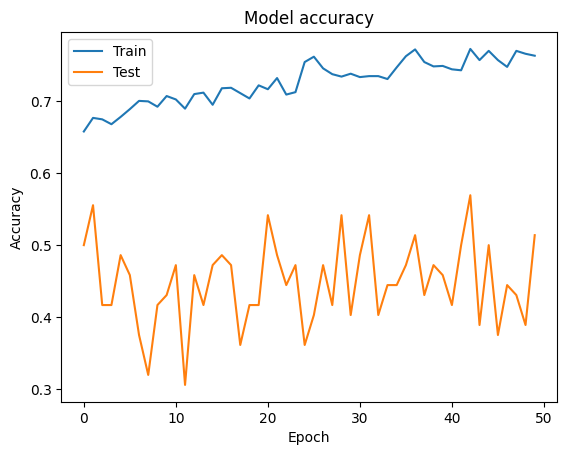

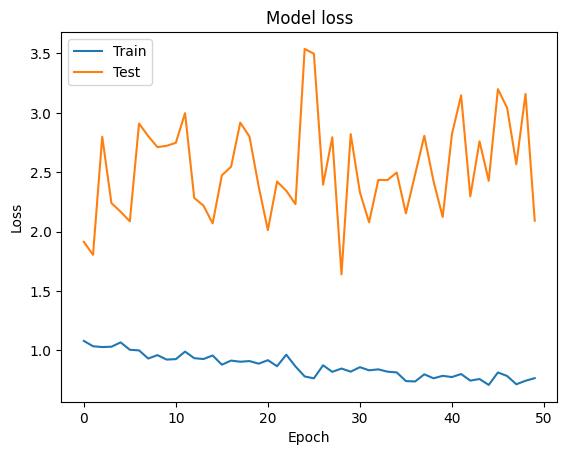

In [56]:
# Plot Train & Test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot Train & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
# Training the model
history = model.fit(datagen.flow(X_train, y_train_onehot, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test_onehot))

Epoch 1/50
47/47 [==============================] - 19s 305ms/step - loss: 2.0858 - accuracy: 0.3764 - val_loss: 2.3555 - val_accuracy: 0.3194
Epoch 2/50
47/47 [==============================] - 14s 298ms/step - loss: 2.0504 - accuracy: 0.3818 - val_loss: 2.3803 - val_accuracy: 0.3889
Epoch 3/50
47/47 [==============================] - 14s 302ms/step - loss: 1.9445 - accuracy: 0.4169 - val_loss: 3.3763 - val_accuracy: 0.1250
Epoch 4/50
47/47 [==============================] - 15s 309ms/step - loss: 1.9511 - accuracy: 0.4291 - val_loss: 3.1751 - val_accuracy: 0.2500
Epoch 5/50
47/47 [==============================] - 13s 279ms/step - loss: 1.9215 - accuracy: 0.4419 - val_loss: 2.0606 - val_accuracy: 0.3611
Epoch 6/50
47/47 [==============================] - 14s 301ms/step - loss: 1.8922 - accuracy: 0.4243 - val_loss: 3.0571 - val_accuracy: 0.2361
Epoch 7/50
47/47 [==============================] - 15s 304ms/step - loss: 1.8483 - accuracy: 0.4500 - val_loss: 2.2907 - val_accuracy: 0.2917

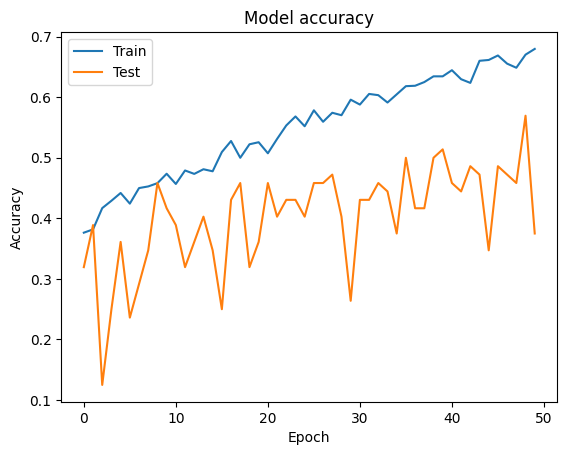

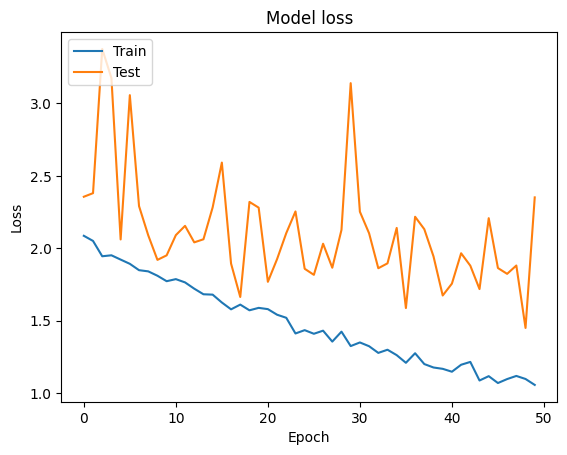

In [51]:
# Plot Train & Test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot Train & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#save the model
model.save("SLR_model_CNN.keras")
print("Model Saved")